In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest



colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']

In [137]:
df = pd.read_csv("dataset/secondary_data.csv",sep=";")

In [30]:
df.head(100)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,p,12.16,x,h,e,f,e,NaN,w,17.46,...,s,y,w,u,w,t,g,NaN,d,u
96,p,16.04,f,h,o,f,e,NaN,w,17.39,...,s,y,w,u,w,t,p,NaN,d,u
97,p,16.31,f,h,e,f,e,NaN,w,17.15,...,s,y,w,u,w,t,g,NaN,d,u
98,p,15.35,f,g,o,f,e,NaN,w,17.89,...,s,y,w,u,w,t,g,NaN,d,u


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [32]:
i=0
for column in df.columns:
    df[column].dropna
    print("{:<2} {:<30} {}".format(i, column, len(df[column])))
    i+=1

0  class                          61069
1  cap-diameter                   61069
2  cap-shape                      61069
3  cap-surface                    61069
4  cap-color                      61069
5  does-bruise-or-bleed           61069
6  gill-attachment                61069
7  gill-spacing                   61069
8  gill-color                     61069
9  stem-height                    61069
10 stem-width                     61069
11 stem-root                      61069
12 stem-surface                   61069
13 stem-color                     61069
14 veil-type                      61069
15 veil-color                     61069
16 has-ring                       61069
17 ring-type                      61069
18 spore-print-color              61069
19 habitat                        61069
20 season                         61069


# Visualizzazione del numero delle classi del dataset 

C:\Users\mich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


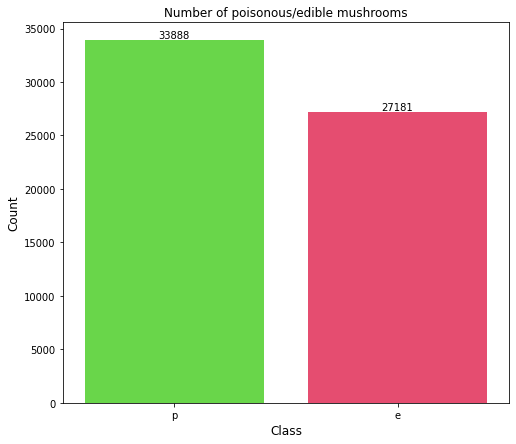

In [33]:
count = df['class'].value_counts()
plt.figure(figsize=(8,7))
#barplot(x = count.index p/e , y = count.values valori di p/e)
ax = sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
ax.bar_label(ax.containers[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
#plt.savefig("mushrooms1.png", format='png', dpi=500)
plt.show()

Show the counts of observations in each categorical bin using bars

C:\Users\mich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\l

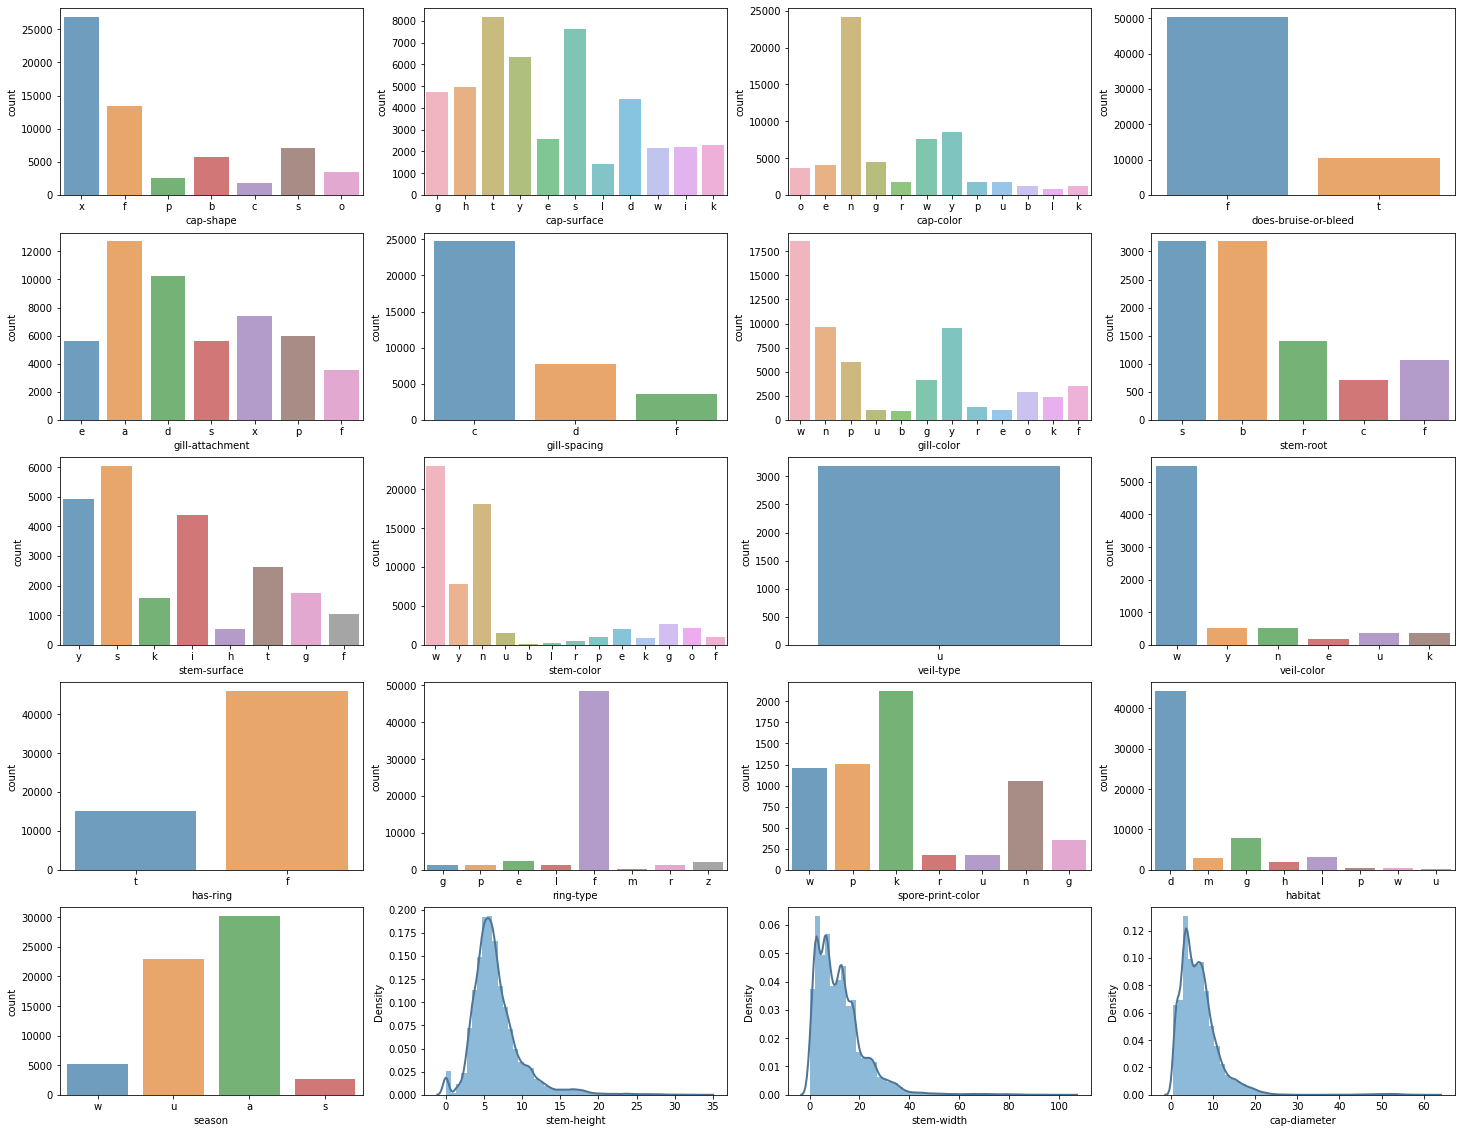

In [79]:
categ =  [ 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
conti = ['stem-height', 'stem-width', 'cap-diameter']

fig = plt.figure(figsize=(25,20))
for i in range(0, len(categ)):
    fig.add_subplot(5,4,i+1)
    sns.countplot(x=categ[i], data=df, alpha=.7) 

for col in conti:
    fig.add_subplot(5,4,i+2)
    i+=1
    sns.distplot(df[col].dropna(), kde_kws={"lw": 2, "color":colors[8]}, 
                hist_kws={"alpha": .5})


## Feature Selection

Mappiano le feature categoriche bla bla

In [138]:
mapping = []
encoder = LabelEncoder()

mapped_dataset = df.astype({"class": 'category', "cap-shape": 'category', "cap-surface": 'category', "cap-color": 'category', "does-bruise-or-bleed": 'category', 
"gill-attachment": 'category', "gill-spacing": 'category', "gill-color": 'category', "stem-root": 'category', "stem-surface": 'category', "stem-color": 'category', 
"veil-type": 'category', "veil-color": 'category', "has-ring": 'category', "ring-type": 'category', "spore-print-color": 'category', "habitat": 'category', 
"season": 'category'}, errors = 'raise')

for i in range(len(mapped_dataset.columns)):
    if (mapped_dataset[mapped_dataset.columns[i]].dtype == "category"):
        mapped_dataset[mapped_dataset.columns[i]] = encoder.fit_transform(mapped_dataset[mapped_dataset.columns[i]])
        mapping_dict = {index : label for index , label in enumerate(encoder.classes_)}
        mapping.append(mapping_dict)

mapped_dataset = mapped_dataset.where(~df.isna(), df)
print(mapping[6])

{0: 'c', 1: 'd', 2: 'f', 3: nan}


Primo approccio base di feature selection andiamo a rimuovere le feature con varianza nulla presenti nel dataset, ovvero quelle features il cui valore è costante.   
Dalla fase di Data Visualization abbiamo notato che una features con varianza nulla è il veil-type.   
#TODO Valutare l'utilizzo di una VarianceThreshold from SkLearn per rimuovere le features con varianza bassa

Secondo approccio:  
Cancelliamo features i cui valori nulli sono maggiori del 20%

In [139]:
mapped_dataset = mapped_dataset.drop(columns='veil-type')
mapped_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int32  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  int32  
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  int32  
 5   does-bruise-or-bleed  61069 non-null  int32  
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  int32  
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  int32  
 14  veil-color            7413 non-null   object 
 15  has-ring           

In [141]:
for col in mapped_dataset:
    if (mapped_dataset[col].dtype == 'object'):
        mapped_dataset[col] = mapped_dataset[col].astype('str').astype('Int64')
        print(mapped_dataset[col].dtype)
mapped_dataset.info()

Int64
Int64
Int64
Int64
Int64
Int64
Int64
Int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int32  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  int32  
 3   cap-surface           46949 non-null  Int64  
 4   cap-color             61069 non-null  int32  
 5   does-bruise-or-bleed  61069 non-null  int32  
 6   gill-attachment       51185 non-null  Int64  
 7   gill-spacing          36006 non-null  Int64  
 8   gill-color            61069 non-null  int32  
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   Int64  
 12  stem-surface          22945 non-null  Int64  
 13  stem-color            61069 non-null  int32  
 14  veil-color            

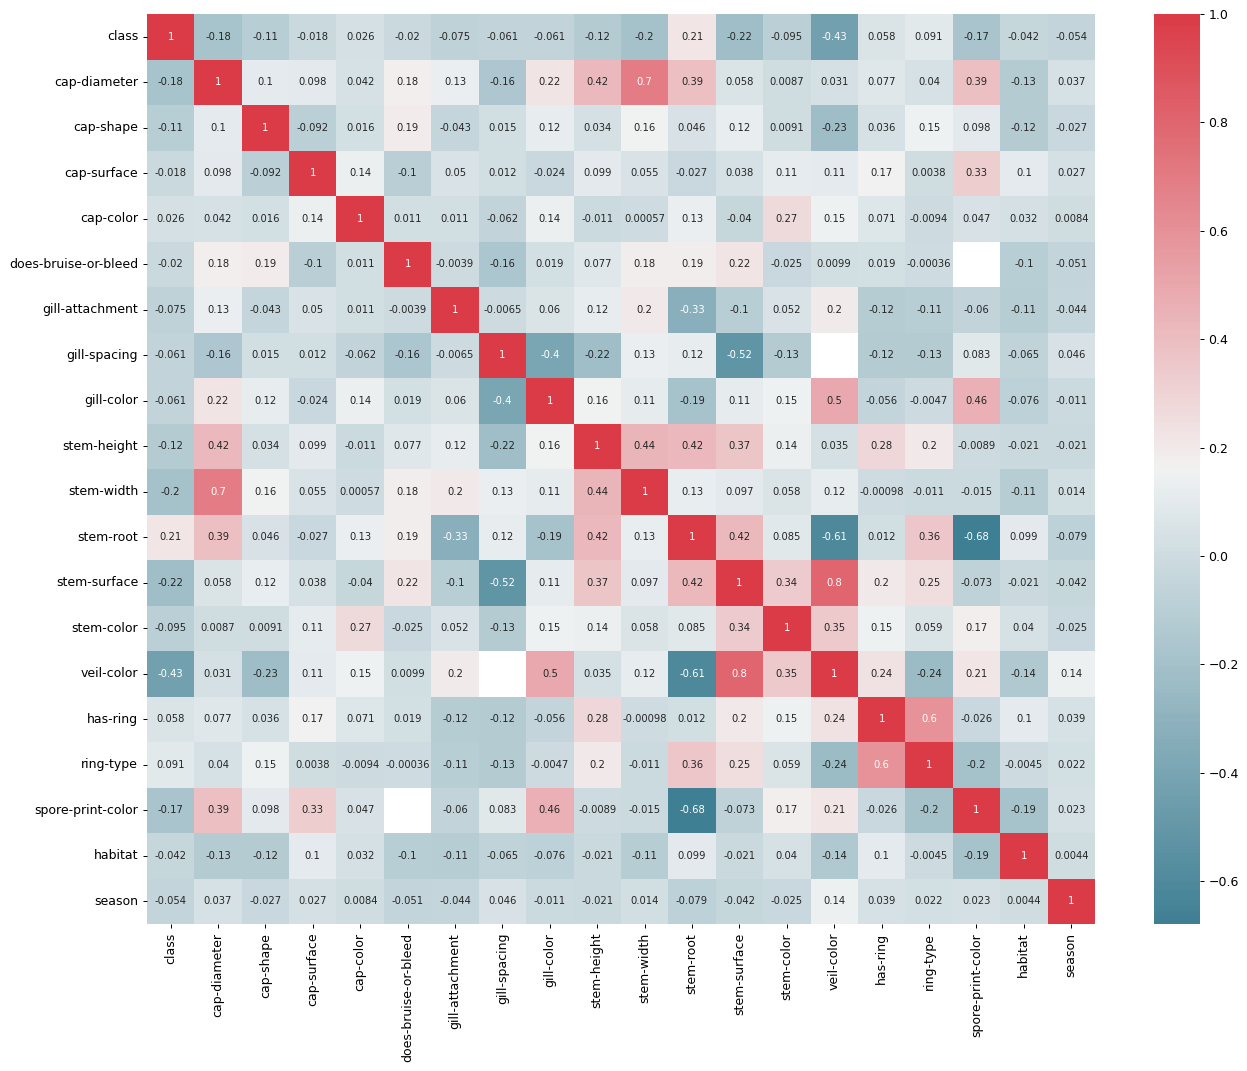

In [149]:
plt.figure(figsize=(15, 12), dpi=90)
sns.heatmap(mapped_dataset.corr(), cmap = sns.diverging_palette(220, 10, as_cmap=True), annot=True, annot_kws={"size":8})
plt.tight_layout()
plt.show()

### Multivariate Feature Imputation

In [142]:
mapped_dataset.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,15.26,6,2,6,0,2,<NA>,10,16.95,17.09,4,7,11,4,1,2,<NA>,0,3
1,1,16.60,6,2,6,0,2,<NA>,10,17.99,18.19,4,7,11,4,1,2,<NA>,0,2
2,1,14.07,6,2,6,0,2,<NA>,10,17.80,17.74,4,7,11,4,1,2,<NA>,0,3
3,1,14.17,2,3,1,0,2,<NA>,10,15.77,15.98,4,7,11,4,1,5,<NA>,0,3
4,1,14.64,6,3,6,0,2,<NA>,10,16.53,17.20,4,7,11,4,1,5,<NA>,0,3


In [146]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer

#imp = SimpleImputer(strategy="most_frequent")
imp = KNNImputer(n_neighbors=1, weights='uniform')

imputedDataset = pd.DataFrame(imp.fit_transform(mapped_dataset))
print(imputedDataset[7].value_counts())

0.0    41894
1.0    15028
2.0     4147
Name: 7, dtype: int64


In [151]:
imputedDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       61069 non-null  float64
 1   1       61069 non-null  float64
 2   2       61069 non-null  float64
 3   3       61069 non-null  float64
 4   4       61069 non-null  float64
 5   5       61069 non-null  float64
 6   6       61069 non-null  float64
 7   7       61069 non-null  float64
 8   8       61069 non-null  float64
 9   9       61069 non-null  float64
 10  10      61069 non-null  float64
 11  11      61069 non-null  float64
 12  12      61069 non-null  float64
 13  13      61069 non-null  float64
 14  14      61069 non-null  float64
 15  15      61069 non-null  float64
 16  16      61069 non-null  float64
 17  17      61069 non-null  float64
 18  18      61069 non-null  float64
 19  19      61069 non-null  float64
dtypes: float64(20)
memory usage: 9.3 MB
